# White Blood Cell Classification

In [9]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import os

## Load and explore dataset

In [10]:
DATASET_DIR = "../input/blood-cells-image-dataset/bloodcells_dataset"
CLASS_NAMES = os.listdir(DATASET_DIR)
NUM_CLASSES = len(CLASS_NAMES)

In [11]:
batch_size = 32
epochs = 10
img_height = 60
img_width = 60

In [12]:
# Import image dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Dataset autotune
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.
Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


2022-06-27 06:37:44.315755: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


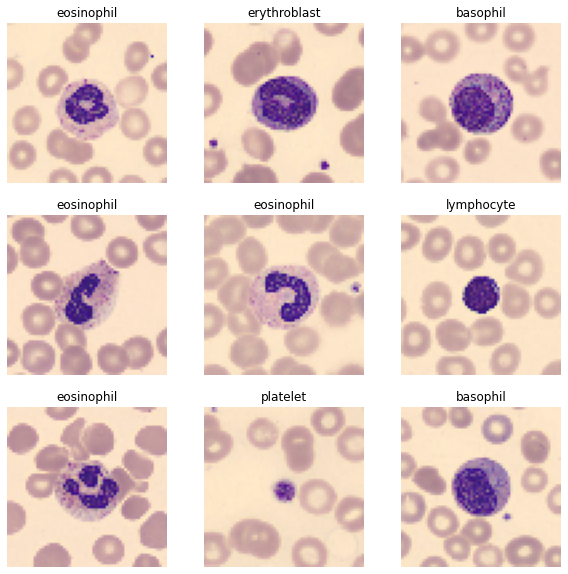

In [13]:
# Show dataset sample
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASS_NAMES[labels[i]])
        plt.axis("off")

## Set up the model 

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
    ])

model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


model.build(input_shape=(0, img_width, img_height, 3))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (0, 60, 60, 3)            0         
_________________________________________________________________
conv2d_3 (Conv2D)            (0, 58, 58, 32)           896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (0, 29, 29, 32)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (0, 27, 27, 32)           9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (0, 13, 13, 32)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (0, 11, 11, 32)           9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (0, 5, 5, 32)            

In [15]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
428/428 [==============================] - 26s 58ms/step - loss: 1.0423 - accuracy: 0.6169 - val_loss: 0.8924 - val_accuracy: 0.6554
Epoch 2/10
428/428 [==============================] - 15s 36ms/step - loss: 0.5940 - accuracy: 0.7886 - val_loss: 0.5924 - val_accuracy: 0.7800
Epoch 3/10
428/428 [==============================] - 16s 37ms/step - loss: 0.4419 - accuracy: 0.8396 - val_loss: 0.5456 - val_accuracy: 0.7943
Epoch 4/10
428/428 [==============================] - 15s 35ms/step - loss: 0.3587 - accuracy: 0.8696 - val_loss: 0.4134 - val_accuracy: 0.8555
Epoch 5/10
428/428 [==============================] - 16s 38ms/step - loss: 0.3025 - accuracy: 0.8918 - val_loss: 0.3454 - val_accuracy: 0.8616
Epoch 6/10
428/428 [==============================] - 15s 36ms/step - loss: 0.2565 - accuracy: 0.9113 - val_loss: 0.2901 - val_accuracy: 0.9035
Epoch 7/10
428/428 [==============================] - 16s 37ms/step - loss: 0.2346 - accuracy: 0.9182 - val_loss: 0.2555 - val_accuracy:

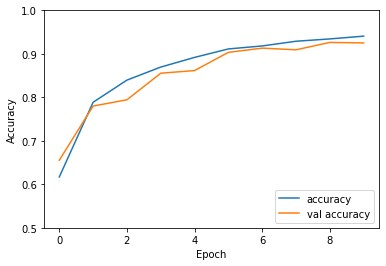

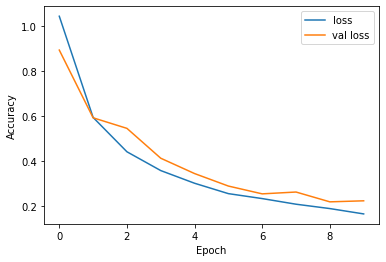

In [17]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")
plt.show()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()